## Week 4: The Metropolis Hastings Algorithm
 


The ergodic theorem seen in class has some very important applications. Let's consider here a (target) distribution $\pi$ with state space $S$, which we want to sample from. To do so, we introduce a (conditional) distribution $q(x|x_i)$ defined for all $x_i \ \in \ S$, and apply the following algorithm (Metropolis Hastings):

1. Initialize $x_0$, and do for $i\in \{0, 1,..., n\}$:
2. Sample $\tilde{x} \sim q(x|x_i)$ (proposed value $\tilde{x}$)
3. Calculate the acceptance probability $P(x_i|\tilde{x}) = \min \left\{ 1 , \dfrac{\pi(\tilde{x})q(x_i|\tilde{x})}{\pi(x_i)q(\tilde{x}|x_i)} \right\}$
4. Sample $\mu$ from Uniform([0,1]) 
5. If $\mu \leq P(x_i|\tilde{x})$, accept new state: $x_{i+1} = \tilde{x}$ 
6. If $\mu > P(x_i|\tilde{x})$, reject new state: $x_{i+1} = x_{i}$
7. Output $(x_0, \ldots , x_n)$ after $n$ runs

We show in homework that the distribution produced by this algorithm converges to $\pi$. The algorithm is very useful since we explore the full state space to a larger extent than we would do when sampling from the target distribution itself.

By simulating the algorithm for $n$ large enough, we thus obtain a sample of the target distribution $\pi$, which only requires knowing the ratio $\frac{\pi(x)}{\pi(y)}$ for all $(x,y) \in S^2$ (cf. step 3). This algorithm extends to the case where the target distribution is continuous, and the following block provides a classical implementation, with the conditional distribution for the proposed value being Gaussian: $q(x|x_i) \sim \mathcal{N(x_i, \sigma^2)}$. Note that since $q$ is symmetric ($q(x|y)=q(y|x)$), the acceptance probability simplifies to $P(x_i|\tilde{x}) = \min \left\{ 1 , \dfrac{\pi(\tilde{x})}{\pi(x_i)} \right\}$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def metropolis_hastings(nruns, x0, sigma, target_pdf):
    # state array
    x_array = np.zeros(nruns+1)
    # initialization
    x_array[0] = x0
    
    for i in range(nruns):
        # sample from Gaussian
        xi = x_array[i]
        x_next = np.random.normal(xi, sigma)
        # acceptance probability
        accept_prob = min(1, target_pdf(x_next)/target_pdf(xi))
        # get mu ~ Unif([0,1])
        mu = np.random.uniform(0,1)
        if mu > accept_prob:
            # reject sampled state
            x_next = xi
        
        x_array[i+1] = x_next
        
    return x_array

Let's plot the trajectory of the MC from applying the algorithm to sample a Gamma distribution (Note that we don't need to know how to compute the Gamma function, which appears in the demoninator of the pdf)

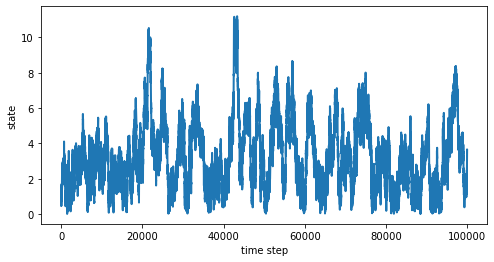

In [4]:
import scipy.stats as st

# specify the number of runs
n = 100000
# standard deviation
sigma = 0.1
# initial point
x0 = 0.5

# specify the Gamma distribution
shape = 2.
scale = 2.

x_array = metropolis_hastings(n, x0, sigma, lambda x: st.gamma.pdf(x, a=shape, scale=scale))
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_xlabel("time step")
ax.set_ylabel("state")
ax.plot(np.arange(n+1), x_array, lw=2)

Let's compare the histogram of samples with the theoretical distribution

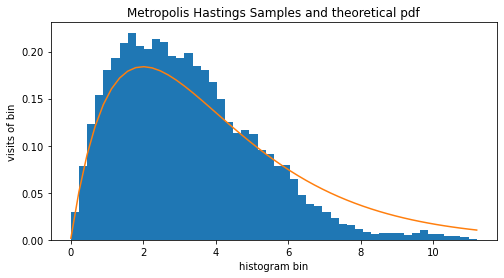

In [5]:
import scipy.stats as st

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title("Metropolis Hastings Samples and theoretical pdf")
ax.set_xlabel("histogram bin")
ax.set_ylabel("visits of bin")
x, bins, p = plt.hist(x_array, 50, density=True)
    
# compare to the theoretical probability density function
gamma_pdf = st.gamma.pdf(bins, shape, scale=scale)
plt.plot(bins, gamma_pdf)


You can play with this script with different distributions, or change the parameters of the algorithm (e.g. change the variance of the prior as shown below). The Metropolis Hastings algorithm is a fundamental example of so-called Monte Carlo Markov Chain (MCMC) Methods, which have applications in all kinds of fields.

Here are some other examples of simulated distributions

(a) Exponential distribution

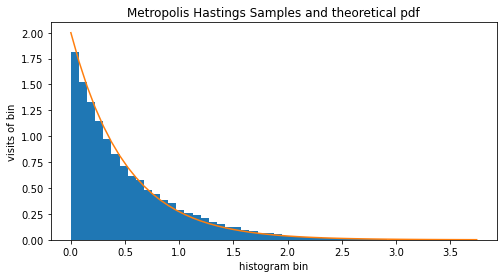

In [6]:
import scipy.stats as st

# specify the number of runs
n = 100000
# standard deviation
sigma = 0.1
# initial point
x0 = 0.5

# specify the Exponential distribution
scale = 1/2.

x_array = metropolis_hastings(n, x0, sigma, lambda x: st.expon.pdf(x, scale=scale))

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title("Metropolis Hastings Samples and theoretical pdf")
ax.set_xlabel("histogram bin")
ax.set_ylabel("visits of bin")
x, bins, p = plt.hist(x_array, 50, density=True)
    
# compare to the theoretical probability density function
expon_pdf = st.expon.pdf(bins, scale=scale)
plt.plot(bins, expon_pdf)

(b) Beta distribution

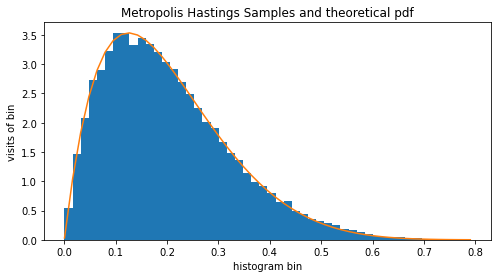

In [7]:
# specify the Beta distribution
alpha = 2.
beta = 8.

x_array = metropolis_hastings(n, x0, sigma, lambda x: st.beta.pdf(x, a=alpha, b=beta))

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title("Metropolis Hastings Samples and theoretical pdf")
ax.set_xlabel("histogram bin")
ax.set_ylabel("visits of bin")
x, bins, p = plt.hist(x_array, 50, density=True)
    
# compare to the theoretical probability density function
beta_pdf = st.beta.pdf(bins, a=alpha, b=beta)
plt.plot(bins, beta_pdf)


(c) Weibull distribution

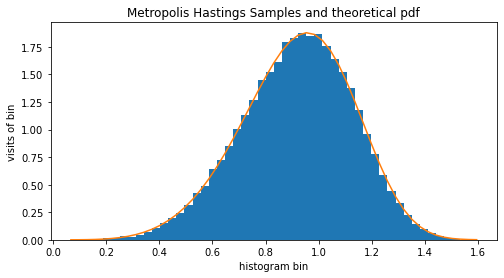

In [8]:
# specify the Weibull distribution
shape = 5.

x_array = metropolis_hastings(n, x0, sigma, lambda x: st.weibull_min.pdf(x, shape))

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title("Metropolis Hastings Samples and theoretical pdf")
ax.set_xlabel("histogram bin")
ax.set_ylabel("visits of bin")
x, bins, p = plt.hist(x_array, 50, density=True)
    
# compare to the theoretical probability density function
weibull_pdf = st.weibull_min.pdf(bins, shape)
plt.plot(bins, weibull_pdf)